#Import Libraries

In [4]:
import torch
import numpy as np
import torchvision.transforms.v2 as transforms
import torch, torchvision, os
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision.datasets
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
import shutil
import os
import re
import cv2
import time
import shutil
import itertools
import zipfile
import urllib.request
import numpy as np
import random
from shutil import copyfile
from PIL import Image
from os import listdir
from sklearn.model_selection import GridSearchCV, StratifiedKFold, ParameterGrid
from sklearn.metrics import confusion_matrix
from os.path import isfile, join
from random import randrange
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
import tensorflow as tf
from kerastuner.tuners import RandomSearch
from scikeras.wrappers import KerasClassifier
import seaborn as sns
import keras_tuner
from tensorflow import keras
from matplotlib.image import imread
import pathlib

<ipython-input-4-d59b9de8a98d>:42: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


#Set connection to 'Soil_Data' on Google drive.

In [5]:
# prompt: connect to the "soil type" folder in my google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Install keras-tuner

In [1]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.8 MB/s eta 0:00:00


#Install scikeras

In [2]:
!pip install scikeras

#Upgrade tensorflow

In [3]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 983.4 kB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


#Checking correct file path andprint folder titles

In [6]:
%cd /content/drive/My\ Drive
%cd Soil_Data/
!ls

/content/drive/My Drive
/content/drive/My Drive/Soil_Data
Alluvial_soil  Clayey_soil  Laterite_soil  Loamy_soil  Sandy_loam  Sandy_soil  test  train


#Set file path

In [7]:
# Specify the path to the directory containing soil type folders
Soil_Image_Path = '/content/drive/MyDrive/Soil_Data'

# Check if the directory exists
if os.path.exists(Soil_Image_Path):
    # List the contents of the directory
    contents = os.listdir(Soil_Image_Path)
    print(f"Contents of {Soil_Image_Path}: {contents} do exist.")
else:
    print(f"The directory {Soil_Image_Path} does not exist.")

Contents of /content/drive/MyDrive/Soil_Data: ['Sandy_soil', 'Sandy_loam', 'Loamy_soil', 'Laterite_soil', 'Alluvial_soil', 'Clayey_soil', 'train', 'test'] do exist.


#View soil folders in 'Soil_Image_Path' to check all folders are present.

In [8]:
# Get a list of all folders in 'Soil_Image_Path'
Soil_Image_Folders = [folder for folder in os.listdir(Soil_Image_Path)
                      if os.path.isdir(os.path.join(Soil_Image_Path, folder))]

# Print the list of folders
print(Soil_Image_Folders)

['Sandy_soil', 'Sandy_loam', 'Loamy_soil', 'Laterite_soil', 'Alluvial_soil', 'Clayey_soil', 'train', 'test']


#Exploratory Data Analysis on Original Files (Images)

Soil Type: Sandy_soil
Image Size: (492, 500)
Color Mode: RGBA
-------------------
Soil Type: Sandy_soil
Image Size: (474, 376)
Color Mode: RGBA
-------------------
Soil Type: Sandy_soil
Image Size: (492, 500)
Color Mode: RGBA
-------------------
Soil Type: Sandy_soil
Image Size: (474, 474)
Color Mode: RGBA
-------------------
Soil Type: Sandy_soil
Image Size: (327, 234)
Color Mode: RGBA
-------------------
Soil Type: Sandy_soil
Image Size: (474, 474)
Color Mode: RGBA
-------------------
Soil Type: Sandy_soil
Image Size: (473, 315)
Color Mode: RGBA
-------------------
Soil Type: Sandy_soil
Image Size: (313, 313)
Color Mode: RGBA
-------------------
Soil Type: Sandy_soil
Image Size: (475, 316)
Color Mode: RGBA
-------------------
Soil Type: Sandy_soil
Image Size: (474, 355)
Color Mode: RGBA
-------------------
Soil Type: Sandy_soil
Image Size: (472, 396)
Color Mode: RGBA
-------------------
Soil Type: Sandy_soil
Image Size: (474, 316)
Color Mode: RGBA
-------------------
Soil Type: Sandy

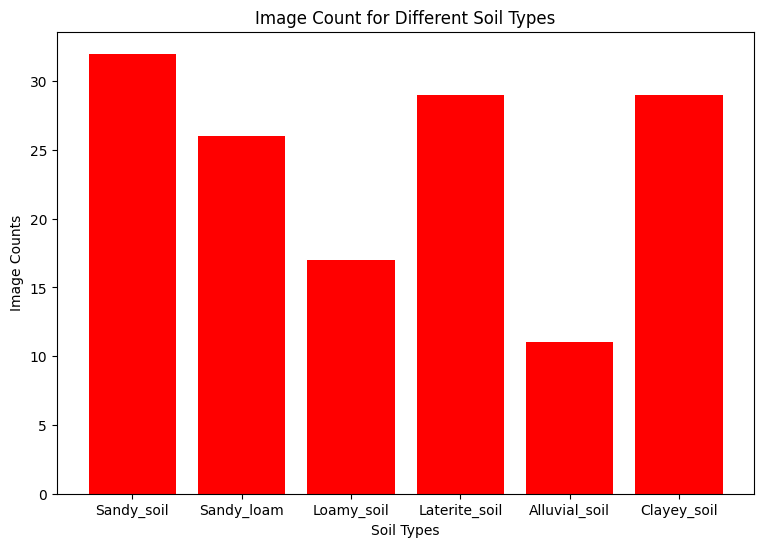

Soil Type: Sandy_soil, Image Count: 32
Soil Type: Sandy_loam, Image Count: 26
Soil Type: Loamy_soil, Image Count: 17
Soil Type: Laterite_soil, Image Count: 29
Soil Type: Alluvial_soil, Image Count: 11
Soil Type: Clayey_soil, Image Count: 29


In [ ]:
# Create lists of soil_types and image count
soil_types_list = []
image_counts_list = []

# for loop to iterate through soil folders
for soil_type in Soil_Image_Folders:
    soil_type_path = os.path.join(Soil_Image_Path, soil_type)

    # Initialize image count
    image_count = 0

    # Iterate through all images in each folder
    for file in os.listdir(soil_type_path):
        if file.lower().endswith(('.png', '.jpg')):
            # Apply transformation to the image
            image_path = os.path.join(soil_type_path, file)
            img = Image.open(image_path)

            # Print details
            print(f'Soil Type: {soil_type}')
            print(f'Image Size: {img.size}')
            print(f'Color Mode: {img.mode}')
            print('-------------------')

            image_count += 1

    # Append data to list
    soil_types_list.append(soil_type)
    image_counts_list.append(image_count)

# Bar plot
plt.figure(figsize=(9, 6))
plt.bar(soil_types_list, image_counts_list, color='red')

# Add labels
plt.xlabel('Soil Types')
plt.ylabel('Image Counts')
plt.title('Image Count for Different Soil Types')

# Show the plot
plt.show()

#Show image count for each soil folder
for soil, count in zip(soil_types_list, image_counts_list):
    print(f"Soil Type: {soil}, Image Count: {count}")

#View first two soil images from each folder

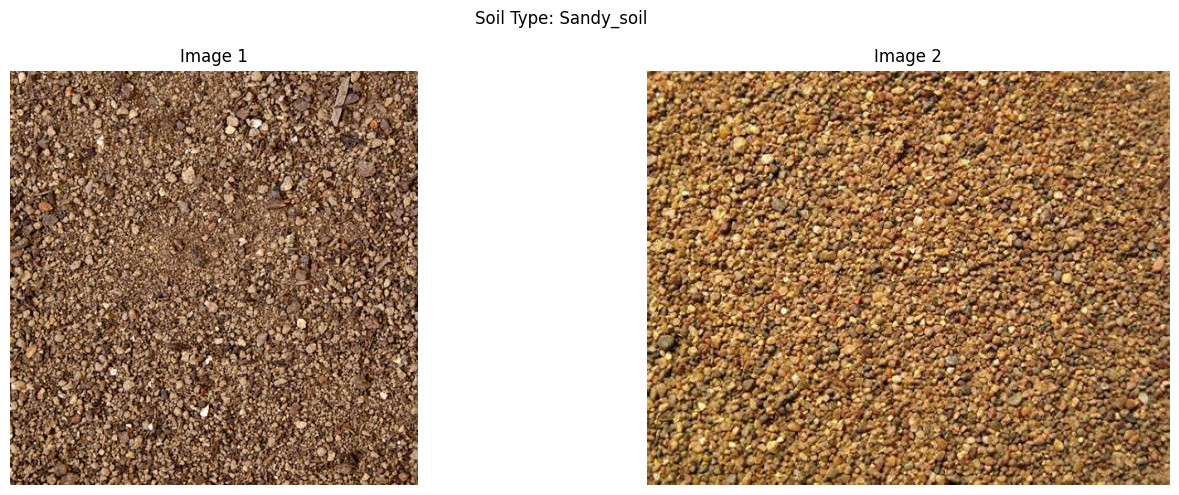

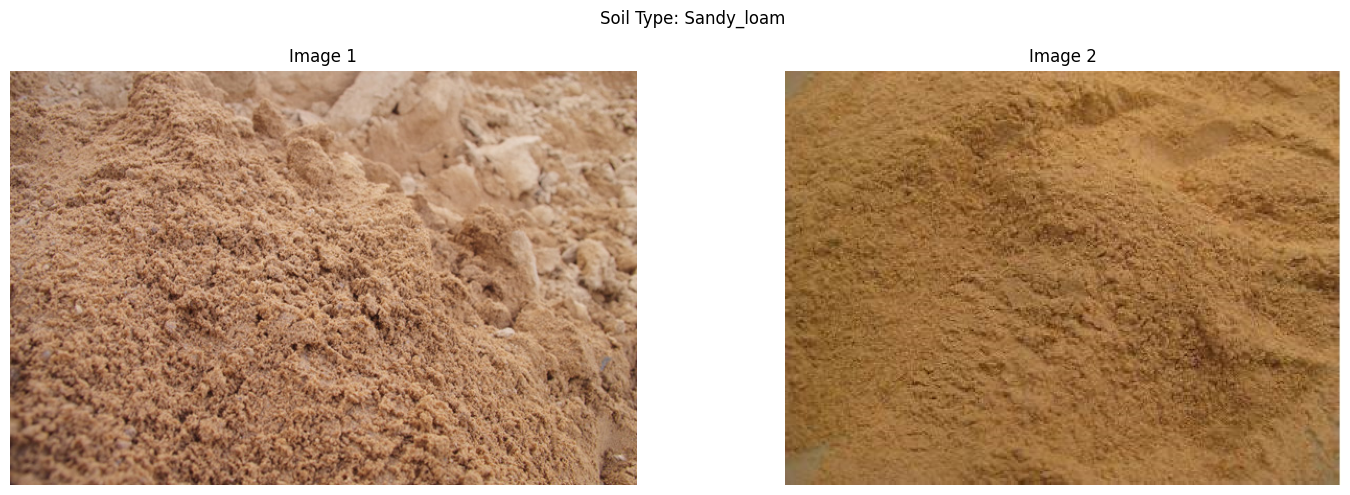

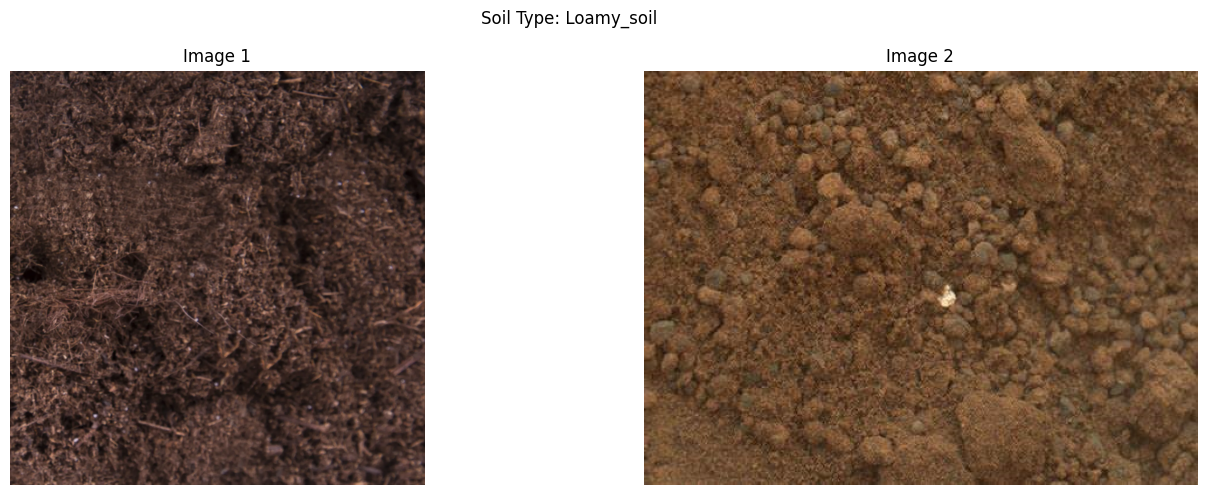

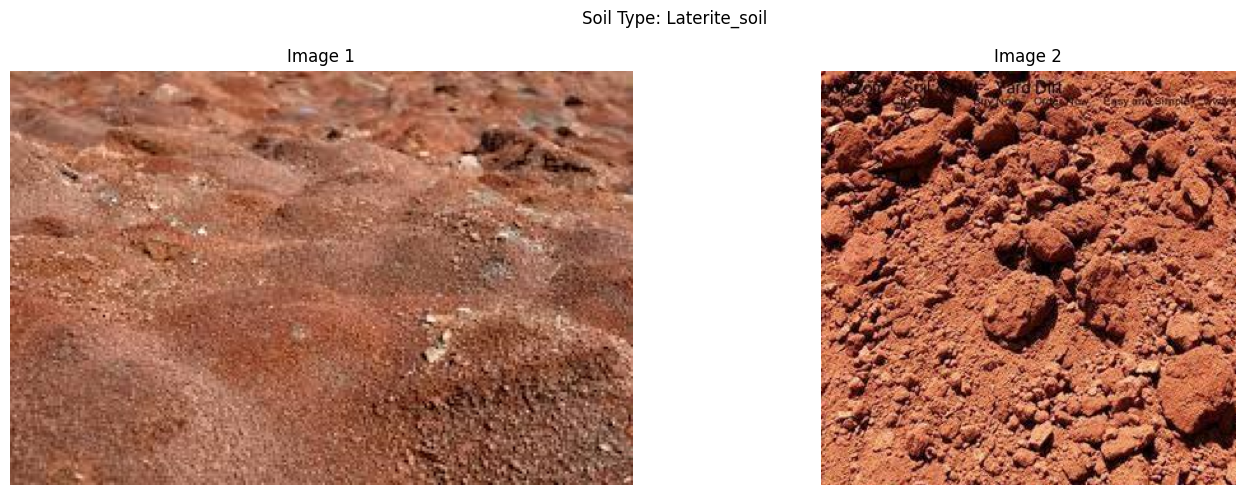

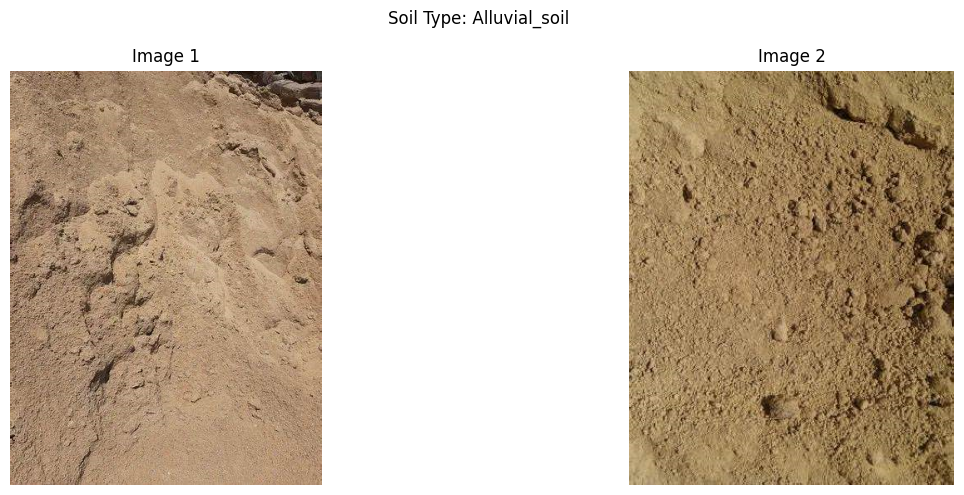

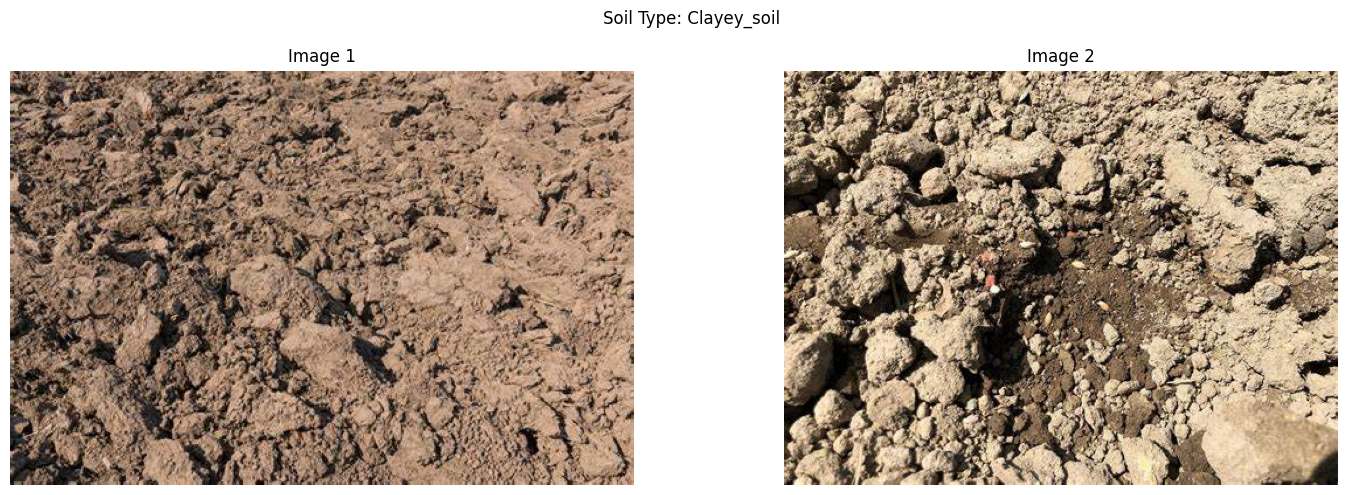

In [ ]:
# For loop to iterate through soil folders
for soil_type in Soil_Image_Folders:
    soil_type_path = os.path.join(Soil_Image_Path, soil_type)

# Set the number of images to display in each row
images_per_row = 2

# For loop to iterate through soil folders
for soil_type in Soil_Image_Folders:
    soil_type_path = os.path.join(Soil_Image_Path, soil_type)

    # Get a list of image files in the folder
    image_files = [file for file in os.listdir(soil_type_path) if file.lower().endswith('.png')]

    # Create subplots for the current soil type
    fig, axes = plt.subplots(1, min(len(image_files), images_per_row), figsize=(15, 5))

    # Iterate through the first two images in each folder
    for i, file in enumerate(image_files[:images_per_row]):
        # Load the image
        img = Image.open(os.path.join(soil_type_path, file))

        # Plot the original image on the corresponding subplot
        img_to_plot = img  # If no transformation is applied
        axes[i].imshow(img_to_plot)
        axes[i].set_title(f'Image {i + 1}')
        axes[i].axis('off')

    # Set the title for the entire subplot
    plt.suptitle(f'Soil Type: {soil_type}')

    # Adjust layout for better spacing
    plt.tight_layout()

#Create train and test folders in 'Soil_Data' and create blank soil folders within the train and test folders

In [ ]:
# Create two folders (train and test)
train_dir = os.path.join(Soil_Image_Path, 'train')

# Remove train directory if they already exist
if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
os.mkdir(train_dir)

test_dir = os.path.join(Soil_Image_Path, 'test')
# Remove test directory if they already exist
if os.path.exists(test_dir):
    shutil.rmtree(test_dir)
os.mkdir(test_dir)

# Under train folder create six folders
# ('Sandy loam', 'Loamy soil', 'Sandy soil', 'Laterite soil', 'Clayey soils', 'Alluvial soil')

train_alluvail_soil_dir = os.path.join(train_dir, 'Alluvial_soil')
os.mkdir(train_alluvail_soil_dir)

train_clayey_soil_dir = os.path.join(train_dir, 'Clayey_soil')
os.mkdir(train_clayey_soil_dir)

train_laterite_soil_dir = os.path.join(train_dir, 'Laterite_soil')
os.mkdir(train_laterite_soil_dir)

train_loamy_soil_dir = os.path.join(train_dir, 'Loamy_soil')
os.mkdir(train_loamy_soil_dir)

train_sandy_loam_dir = os.path.join(train_dir, 'Sandy_loam')
os.mkdir(train_sandy_loam_dir)

train_sandy_soil_dir = os.path.join(train_dir, 'Sandy_soil')
os.mkdir(train_sandy_soil_dir)

# Under test folder create six folders
# ('Sandy loam', 'Loamy soil', 'Sandy soil', 'Laterite soil', 'Clayey soils', 'Alluvial soil')

test_alluvail_soil_dir = os.path.join(test_dir, 'Alluvial_soil')
os.mkdir(test_alluvail_soil_dir)

test_clayey_soil_dir = os.path.join(test_dir, 'Clayey_soil')
os.mkdir(test_clayey_soil_dir)

test_laterite_soil_dir = os.path.join(test_dir, 'Laterite_soil')
os.mkdir(test_laterite_soil_dir)

test_loamy_soil_dir = os.path.join(test_dir, 'Loamy_soil')
os.mkdir(test_loamy_soil_dir)

test_sandy_loam_dir = os.path.join(test_dir, 'Sandy_loam')
os.mkdir(test_sandy_loam_dir)

test_sandy_soil_dir = os.path.join(test_dir, 'Sandy_soil')
os.mkdir(test_sandy_soil_dir)

# Created function to split the image data from the source directory into training and test sets based on a specified split size.

In [ ]:
# Get a list of non-empty files in the source directory
def split_data(SOURCE, TRAINING, TEST, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    # Determine the size of training and validation sets
    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)

    # Shuffle the list of files
    shuffled_set = random.sample(files, len(files))

    # Split the shuffled list into training and validation sets
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    # Copy files from the source to the training directory
    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    # Copy files from the source to the test directory for validation
    for filename in valid_set:
        this_file = SOURCE + filename
        destination = TEST + filename
        copyfile(this_file, destination)






#Set up directories for the original source and the training and test datasets for different types of soil.

In [ ]:
alluvia_soil_source_dir = '/content/drive/MyDrive/Soil_Data/Alluvial_soil/'
training_alluvia_soil_dir = '/content/drive/MyDrive/Soil_Data/train/Alluvial_soil/'
test_alluvia_soil_dir = '/content/drive/MyDrive/Soil_Data/test/Alluvial_soil/'

clayey_soil_source_dir = '/content/drive/MyDrive/Soil_Data/Clayey_soil/'
training_clayey_soil_dir = '/content/drive/MyDrive/Soil_Data/train/Clayey_soil/'
test_clayey_soil_dir = '/content/drive/MyDrive/Soil_Data/test/Clayey_soil/'

laterite_soil_source_dir = '/content/drive/MyDrive/Soil_Data/Laterite_soil/'
training_laterite_soil_dir = '/content/drive/MyDrive/Soil_Data/train/Laterite_soil/'
test_laterite_soil_dir = '/content/drive/MyDrive/Soil_Data/test/Laterite_soil/'

loamy_soil_source_dir = '/content/drive/MyDrive/Soil_Data/Loamy_soil/'
training_loamy_soil_dir = '/content/drive/MyDrive/Soil_Data/train/Loamy_soil/'
test_loamy_soil_dir = '/content/drive/MyDrive/Soil_Data/test/Loamy_soil/'

sandy_loam_source_dir = '/content/drive/MyDrive/Soil_Data/Sandy_loam/'
training_sandy_loam_dir = '/content/drive/MyDrive/Soil_Data/train/Sandy_loam/'
test_sandy_loam_dir = '/content/drive/MyDrive/Soil_Data/test/Sandy_loam/'

sandy_soil_source_dir = '/content/drive/MyDrive/Soil_Data/Sandy_soil/'
training_sandy_soil_dir = '/content/drive/MyDrive/Soil_Data/train/Sandy_soil/'
test_sandy_soil_dir = '/content/drive/MyDrive/Soil_Data/test/Sandy_soil/'


#Conduct train and test split of image data

In [ ]:
#Due to small dataset size, we will conduct a 70-30, train-test split to ensure enough representation of each soil type is
#present in each soil test folder
split_size = .70

split_data(alluvia_soil_source_dir, training_alluvia_soil_dir, test_alluvia_soil_dir, split_size)
split_data(clayey_soil_source_dir, training_clayey_soil_dir, test_clayey_soil_dir, split_size)
split_data(laterite_soil_source_dir, training_laterite_soil_dir, test_laterite_soil_dir, split_size)
split_data(loamy_soil_source_dir, training_loamy_soil_dir, test_loamy_soil_dir, split_size)
split_data(sandy_loam_source_dir, training_sandy_loam_dir, test_sandy_loam_dir, split_size)
split_data(sandy_soil_source_dir, training_sandy_soil_dir, test_sandy_soil_dir, split_size)

#Exploratory data analysis of train and test data

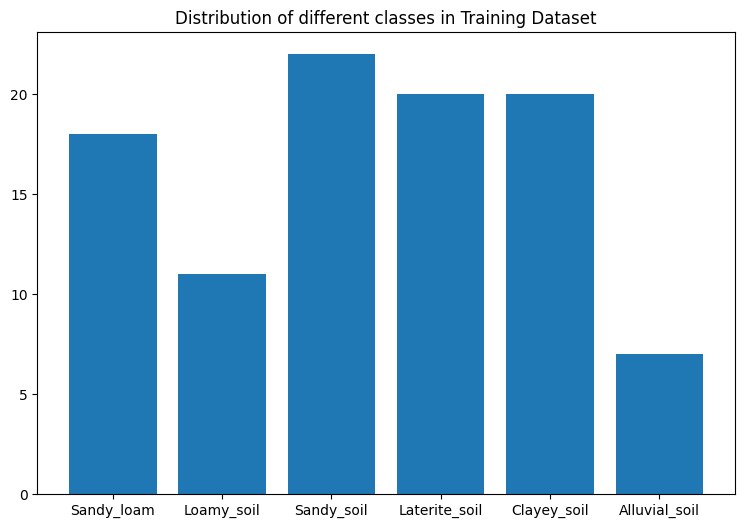

Soil Type: Sandy_loam, Image Count: 18
Soil Type: Loamy_soil, Image Count: 11
Soil Type: Sandy_soil, Image Count: 22
Soil Type: Laterite_soil, Image Count: 20
Soil Type: Clayey_soil, Image Count: 20
Soil Type: Alluvial_soil, Image Count: 7


In [9]:
# List of soil types in the image dataset
image_folder = ['Sandy_loam', 'Loamy_soil', 'Sandy_soil', 'Laterite_soil', 'Clayey_soil', 'Alluvial_soil']

# Dictionary to store the number of images for each soil type
nimgs = {}

# Count the number of images in each soil type folder
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/Soil_Data/train/' + i + '/'))
    nimgs[i] = nimages

# Plot a bar chart to visualize the distribution of different classes in the training dataset
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

# Display image count for each soil folder
for soil, count in nimgs.items():
    print(f"Soil Type: {soil}, Image Count: {count}")

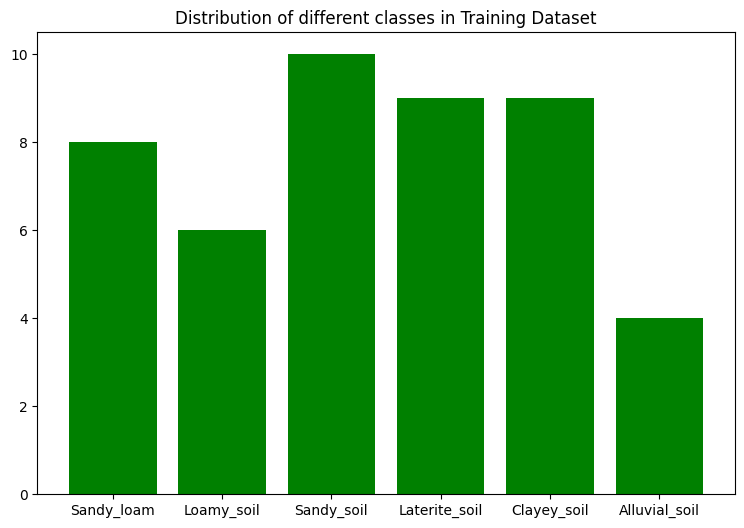

Soil Type: Sandy_loam, Image Count: 8
Soil Type: Loamy_soil, Image Count: 6
Soil Type: Sandy_soil, Image Count: 10
Soil Type: Laterite_soil, Image Count: 9
Soil Type: Clayey_soil, Image Count: 9
Soil Type: Alluvial_soil, Image Count: 4


In [10]:
# Dictionary to store the number of images for each soil type
nimgs = {}

# Count the number of images in each soil type folder
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/Soil_Data/test/' + i + '/'))
    nimgs[i] = nimages

# Plot a bar chart to visualize the distribution of different classes in the training dataset
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center', color = 'green')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

# Display image count for each soil folder
for soil, count in nimgs.items():
    print(f"Soil Type: {soil}, Image Count: {count}")

Data Augmentation on training data and rescaling of test data

In [11]:
train_directory = '/content/drive/MyDrive/Soil_Data/train/'
test_directory = '/content/drive/MyDrive/Soil_Data/test/'

# Create set up for data augmentation on training dataset
train_image_data_gen = ImageDataGenerator(
    rescale=1./255, # Rescale the pixel values of the images to be in the range 0 and 1.
    rotation_range=40, # Randomly rotate images up to 40 degrees.
    horizontal_flip=True, # Random horizontal flipping of images.
    zoom_range=0.2, # Randomly zoom images in or out by up to 20%.
    width_shift_range=0.2, #S hift images up to 20% of their width.
    height_shift_range=0.2, # Shift images up to 20% of their height.
    shear_range=0.2, #S hift image along its x or y-axis with a maximum shear angle of 0.2 radians.
    fill_mode='nearest') # Use nearest pixel value to fill in newly created pixels due to augmentations conducted.

test_image_data_gen = ImageDataGenerator(rescale = 1./255) #Rescale test data pixel values of the images to be in the range 0 and 1.

Load training and testing data from specified directories.

In [12]:
# Load data into Python
training_data = train_image_data_gen.flow_from_directory(
    train_directory, # Directory containing the training data.
    target_size = (256, 256),  #Set dimensions for images to be resized to during loading.
    batch_size = 32, # The number of images in each batch.
    class_mode = 'categorical', # Labels are provided in categorical format; suitable for multi-class classification tasks.
    color_mode='rgb'  # Set color_mode to 'rgb' to convert images from RGBA to RGB format
)

testing_data = test_image_data_gen.flow_from_directory(
    test_directory, # Directory containing the test data.
    target_size = (256 ,256), # Set dimensions for images to be resized to during loading.
    batch_size = 32, # The number of images in each batch.
    class_mode = 'categorical', # Labels are provided in categorical format; suitable for multi-class classification tasks.
    color_mode='rgb',  # Set color_mode to 'rgb' to convert images from RGBA to RGB format
    shuffle = False
)

Found 98 images belonging to 6 classes.
Found 46 images belonging to 6 classes.


# Simple CNN 1

Set parameters for CNN

In [14]:
# Choose model parameters
layer_size_1 = 32
kernel_size_1 = (3,3)
layer_size_2 = 64
kernel_size_2 = (3,3)
dense_layer_neurons_1 = 128
num_classes = 6

Create the sequential model.

In [15]:
# Create a Sequential model
cnn1_model = Sequential([
    Conv2D(layer_size_1, (kernel_size_1),
           activation='relu',
           input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(layer_size_2, (kernel_size_2),
           activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(dense_layer_neurons_1,
          activation='relu'),

    Dense(num_classes,
          activation='softmax')  # Adjust 'num_classes' based on your task
])

# Compile the model
cnn1_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
cnn1_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 128)               3

Train the model

In [16]:
# Train the CNN model using the provided training data generator
history = cnn1_model.fit_generator(
    training_data,  # Training data generator
    steps_per_epoch=len(training_data),  # Number of steps (batches) per epoch
    epochs=30,  # Number of epochs for training
    verbose=1,  # Verbosity mode: 1 for progress bar
    validation_data=testing_data,  # Validation data generator
    validation_steps=len(testing_data)  # Number of steps (batches) for validation
)

<ipython-input-16-461e2b21686b>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = cnn1_model.fit_generator(training_data,


Epoch 1/30
4/4 [==============================] - 59s 12s/step - loss: 4.9781 - accuracy: 0.2959 - val_loss: 4.8806 - val_accuracy: 0.2826
Epoch 2/30
4/4 [==============================] - 20s 6s/step - loss: 2.1390 - accuracy: 0.3265 - val_loss: 1.5609 - val_accuracy: 0.4130
Epoch 3/30
4/4 [==============================] - 26s 7s/step - loss: 1.4725 - accuracy: 0.3878 - val_loss: 1.4788 - val_accuracy: 0.4130
Epoch 4/30
4/4 [==============================] - 23s 7s/step - loss: 1.3043 - accuracy: 0.4184 - val_loss: 1.2413 - val_accuracy: 0.4783
Epoch 5/30
4/4 [==============================] - 16s 4s/step - loss: 1.3116 - accuracy: 0.4694 - val_loss: 1.2244 - val_accuracy: 0.4565
Epoch 6/30
4/4 [==============================] - 19s 4s/step - loss: 1.2119 - accuracy: 0.4388 - val_loss: 1.0777 - val_accuracy: 0.4783
Epoch 7/30
4/4 [==============================] - 16s 5s/step - loss: 2.0295 - accuracy: 0.3265 - val_loss: 1.3051 - val_accuracy: 0.4130
Epoch 8/30
4/4 [=================

#Simple CNN 2

Set parameters for CNN

In [17]:
# choose model parameters
layer_size_1 = 32
kernel_size_1 = (3,3)
layer_size_2 = 64
kernel_size_2 = (3,3)
layer_size_3 = 128
kernel_size_3 = (3,3)
dense_layer_neurons_1 = 128
dense_layer_neurons_2 = 64
num_classes = 6

Create the sequential model.

In [18]:
# Create a Sequential model
cnn2_model = Sequential([
    # First convolutional layer
    Conv2D(layer_size_1, (kernel_size_1),
           activation='relu',
           input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),  # Max pooling layer

    # Second convolutional layer
    Conv2D(layer_size_2, (kernel_size_2),
           activation='relu'),
    MaxPooling2D((2, 2)),  # Max pooling layer

    # Third convolutional layer
    Conv2D(layer_size_3, (kernel_size_3),
          activation='relu'),
    MaxPooling2D((2, 2)),  # Max pooling layer

    Flatten(),  # Flatten layer to convert 3D output to 1D

    # First fully connected layer
    Dense(dense_layer_neurons_1,
          activation='relu'),

    # Second fully connected layer
    Dense(dense_layer_neurons_2,
          activation='relu'),

    # Output layer with softmax activation
    Dense(num_classes,
          activation='softmax')
])

# Compile the model
cnn2_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Display the model summary
cnn2_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 128)      

Train the model

In [19]:
# Train the CNN model using the provided training data generator
history = cnn1_model.fit_generator(
    training_data,  # Training data generator
    steps_per_epoch=len(training_data),  # Number of steps (batches) per epoch
    epochs=30,  # Number of epochs for training
    verbose=1,  # Verbosity mode: 1 for progress bar
    validation_data=testing_data,  # Validation data generator
    validation_steps=len(testing_data)  # Number of steps (batches) for validation
)

<ipython-input-19-5ae19ec1750b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = cnn2_model.fit_generator(training_data,


Epoch 1/30
4/4 [==============================] - 23s 5s/step - loss: 2.2124 - accuracy: 0.1735 - val_loss: 1.8754 - val_accuracy: 0.2174
Epoch 2/30
4/4 [==============================] - 18s 4s/step - loss: 1.7578 - accuracy: 0.1939 - val_loss: 1.8546 - val_accuracy: 0.1304
Epoch 3/30
4/4 [==============================] - 21s 7s/step - loss: 1.7548 - accuracy: 0.2551 - val_loss: 1.6716 - val_accuracy: 0.3696
Epoch 4/30
4/4 [==============================] - 18s 4s/step - loss: 1.7281 - accuracy: 0.2755 - val_loss: 1.9888 - val_accuracy: 0.1957
Epoch 5/30
4/4 [==============================] - 18s 6s/step - loss: 1.6224 - accuracy: 0.3367 - val_loss: 1.5924 - val_accuracy: 0.3913
Epoch 6/30
4/4 [==============================] - 18s 4s/step - loss: 1.5094 - accuracy: 0.3776 - val_loss: 2.1054 - val_accuracy: 0.1957
Epoch 7/30
4/4 [==============================] - 18s 4s/step - loss: 1.6514 - accuracy: 0.3367 - val_loss: 1.3966 - val_accuracy: 0.4348
Epoch 8/30
4/4 [==================

#Hyperparamter tuning on Simple CNN 1


In [ ]:
# Create CNN function
def create_model(layer_size_1, kernel_size_1, layer_size_2, kernel_size_2, dense_layer_neurons_1, num_classes):
    """
    Create a Convolutional Neural Network (CNN) model with specified architecture.

    Parameters:
    - layer_size_1: Number of filters in the first convolutional layer.
    - kernel_size_1: Size of the kernel in the first convolutional layer.
    - layer_size_2: Number of filters in the second convolutional layer.
    - kernel_size_2: Size of the kernel in the second convolutional layer.
    - dense_layer_neurons_1: Number of neurons in the first dense layer.
    - num_classes: Number of output classes.

    Returns:
    - A compiled CNN model.
    """
    model = Sequential([
        Conv2D(layer_size_1, kernel_size_1, activation='relu', input_shape=(256, 256, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(layer_size_2, kernel_size_2, activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(dense_layer_neurons_1, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create hyperparameter grid
param_grid = {
    'layer_size_1': [32, 64],
    'kernel_size_1': [(3, 3), (5, 5)],
    'layer_size_2': [64, 128],
    'kernel_size_2': [(3, 3), (5, 5)],
    'dense_layer_neurons_1': [128, 256],
    'num_classes': [6]
}

# Use StratifiedKFold for better validation on imbalanced datasets
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Loop through grid search parameters and train the model for each set of parameters
results = []
for params in ParameterGrid(param_grid):
    print("Training with parameters:", params)

    # Create a new model with the current set of parameters
    current_model = create_model(**params)

    # Train the model using the data generator
    current_history = current_model.fit_generator(
        training_data,
        steps_per_epoch=len(training_data),
        epochs=30,
        verbose=1,
        validation_data=testing_data,
        validation_steps=len(testing_data)
    )

    # Collect results,
    results.append({
        'params': params,
        'history': current_history.history
    })

# Analyze the results
for result in results:
    params = result['params']
    history = result['history']
    print("Parameters:", params)
    print("Training Accuracy:", history['accuracy'])

NameError: name 'StratifiedKFold' is not defined

#Model 1: Simple CNN 1 with Batch Normalisation, Early Stoppage and Hyperparameter Tuning; cross validation with grid search.


In [ ]:
# Create CNN function with Batch Normalization
def create_model_with_batch_norm(layer_size_1, kernel_size_1, layer_size_2, kernel_size_2, dense_layer_neurons_1, num_classes):

    model = Sequential([
        Conv2D(layer_size_1, kernel_size_1, activation='relu', input_shape=(256, 256, 3)),
        BatchNormalization(),  # Batch Normalization layer
        MaxPooling2D((2, 2)),

        Conv2D(layer_size_2, kernel_size_2, activation='relu'),
        BatchNormalization(),  # Batch Normalization layer
        MaxPooling2D((2, 2)),

        Flatten(),

        Dense(dense_layer_neurons_1, activation='relu'),
        BatchNormalization(),  # Batch Normalization layer

        Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create hyperparameter grid
param_grid = {
    'layer_size_1': [32, 64],
    'kernel_size_1': [(3, 3), (5, 5)],
    'layer_size_2': [64, 128],
    'kernel_size_2': [(3, 3), (5, 5)],
    'dense_layer_neurons_1': [64, 128],
    'num_classes': [6]
}

# Use StratifiedKFold for better validation on imbalanced datasets
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Loop through grid search parameters and train the model for each set of parameters
results = []
for params in ParameterGrid(param_grid):
    print("Training with parameters:", params)

    # Create a new model with the current set of parameters
    current_model = create_model_with_batch_norm(**params)

    # Implement Early Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model using the data generator
    current_history = current_model.fit_generator(
        training_data,
        steps_per_epoch=len(training_data),
        epochs=30,
        verbose=1,
        validation_data=testing_data,
        validation_steps=len(testing_data),
        callbacks=[early_stopping]
    )

    # Collect results
    results.append({
        'params': params,
        'history': current_history.history
    })

# Analyze the results
for result in results:
    params = result['params']
    history = result['history']
    print("Parameters:", params)
    print("Training Accuracy:", history['accuracy'])

Training with parameters: {'dense_layer_neurons_1': 64, 'kernel_size_1': (3, 3), 'kernel_size_2': (3, 3), 'layer_size_1': 32, 'layer_size_2': 64, 'num_classes': 6}


<ipython-input-7-ce057119a30b>:50: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  current_history = current_model.fit_generator(


Epoch 1/30
4/4 [==============================] - 26s 5s/step - loss: 1.5274 - accuracy: 0.5510 - val_loss: 3.4800 - val_accuracy: 0.2174
Epoch 2/30
4/4 [==============================] - 18s 4s/step - loss: 1.0582 - accuracy: 0.6837 - val_loss: 1.7633 - val_accuracy: 0.2826
Epoch 3/30
4/4 [==============================] - 22s 5s/step - loss: 0.7527 - accuracy: 0.7449 - val_loss: 1.6746 - val_accuracy: 0.3478
Epoch 4/30
4/4 [==============================] - 19s 4s/step - loss: 0.7223 - accuracy: 0.7551 - val_loss: 1.7546 - val_accuracy: 0.1957
Epoch 5/30
4/4 [==============================] - 21s 5s/step - loss: 0.5969 - accuracy: 0.8265 - val_loss: 1.7653 - val_accuracy: 0.1957
Epoch 6/30
4/4 [==============================] - 22s 5s/step - loss: 0.7128 - accuracy: 0.7551 - val_loss: 1.8112 - val_accuracy: 0.2174
Epoch 7/30
4/4 [==============================] - 18s 4s/step - loss: 0.5826 - accuracy: 0.7857 - val_loss: 1.9514 - val_accuracy: 0.1957
Epoch 8/30
4/4 [==================

#Model 2: Simple CNN 2 with Batch Normalisation, Early Stoppage and Hyperparameter Tuning; cross validation with grid search.

In [ ]:
# Create CNN function with Batch Normalization
def create_model_with_batch_norm(layer_size_1, kernel_size_1, layer_size_2, kernel_size_2, layer_size_3, kernel_size_3, dense_layer_neurons_1, dense_layer_neurons_2, num_classes):

    model = Sequential([
        Conv2D(layer_size_1, kernel_size_1, activation='relu', input_shape=(256, 256, 3)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(layer_size_2, kernel_size_2, activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(layer_size_3, kernel_size_3, activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Flatten(),

        Dense(dense_layer_neurons_1, activation='relu'),
        BatchNormalization(),

        Dense(dense_layer_neurons_2, activation='relu'),
        BatchNormalization(),

        Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create hyperparameter grid
param_grid = {
    'layer_size_1': [32, 64],
    'kernel_size_1': [(3, 3), (5, 5)],
    'layer_size_2': [64, 128],
    'kernel_size_2': [(3, 3), (5, 5)],
    'layer_size_3': [64, 128],
    'kernel_size_3': [(3, 3), (5, 5)],
    'dense_layer_neurons_1': [128, 256],
    'dense_layer_neurons_2': [64, 128],
    'num_classes': [6]
}

# Use StratifiedKFold for better validation on imbalanced datasets
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Loop through grid search parameters and train the model for each set of parameters
results = []
for params in ParameterGrid(param_grid):
    print("Training with parameters:", params)

    # Create a new model with the current set of parameters
    current_model = create_model_with_batch_norm(**params)

    # Implement Early Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model using the data generator
    current_history = current_model.fit_generator(
        training_data,
        steps_per_epoch=len(training_data),
        epochs=30,
        verbose=1,
        validation_data=testing_data,
        validation_steps=len(testing_data),
        callbacks=[early_stopping]
    )

    # Collect results
    results.append({
        'params': params,
        'history': current_history.history
    })

# Analyze the results
for result in results:
    params = result['params']
    history = result['history']
    print("Parameters:", params)
    print("Training Accuracy:", history['accuracy'])

Training with parameters: {'dense_layer_neurons_1': 128, 'dense_layer_neurons_2': 64, 'kernel_size_1': (3, 3), 'kernel_size_2': (3, 3), 'kernel_size_3': (3, 3), 'layer_size_1': 32, 'layer_size_2': 64, 'layer_size_3': 64, 'num_classes': 6}


<ipython-input-33-a572c79b232d>:62: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  current_history = current_model.fit_generator(


Epoch 1/30
4/4 [==============================] - 26s 5s/step - loss: 1.6748 - accuracy: 0.3980 - val_loss: 1.8181 - val_accuracy: 0.2609


KeyboardInterrupt: 

#Model 3: Simple CNN 1 with Batch Normalisation and optimal hyperparameters from cross validation with grid search.


In [ ]:
# Create a Sequential model
final_batch_model = Sequential([
    # First convolutional layer
    Conv2D(64, (3, 3),
           activation='relu',
           input_shape=(256, 256, 3)),
    BatchNormalization(),  # Batch Normalization layer
    MaxPooling2D((2, 2)),

    # Second convolutional layer
    Conv2D(64, (3, 3),
           activation='relu'),
    BatchNormalization(),  # Batch Normalization layer
    MaxPooling2D((2, 2)),

    Flatten(),

    # Fully connected layer
    Dense(64,
          activation='relu'),
    BatchNormalization(),  # Batch Normalization layer

    # Output layer with softmax activation
    Dense(6, activation='softmax')
])

# Compile the model
final_batch_model.compile(optimizer='adam',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

# Display the model summary
final_batch_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 127, 127, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
# Train the model with dropout for regularization
history_dropout = dropout_stoppage_model.fit_generator(
    training_data,  # Training data generator
    steps_per_epoch=len(training_data),  # Number of steps (batches) per epoch
    epochs=30,  # Number of epochs for training
    verbose=1,  # Verbosity mode: 1 for progress bar
    validation_data=testing_data,  # Validation data generator
    validation_steps=len(testing_data)  # Number of steps (batches) for validation
)

<ipython-input-11-471627691b57>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_data,


Epoch 1/30
4/4 [==============================] - 109s 25s/step - loss: 1.5711 - accuracy: 0.5408 - val_loss: 2.2519 - val_accuracy: 0.2174
Epoch 2/30
4/4 [==============================] - 31s 10s/step - loss: 0.8409 - accuracy: 0.7551 - val_loss: 1.7343 - val_accuracy: 0.2391
Epoch 3/30
4/4 [==============================] - 36s 9s/step - loss: 0.8834 - accuracy: 0.7449 - val_loss: 1.6469 - val_accuracy: 0.3478
Epoch 4/30
4/4 [==============================] - 32s 7s/step - loss: 0.7909 - accuracy: 0.7551 - val_loss: 1.7655 - val_accuracy: 0.3478
Epoch 5/30
4/4 [==============================] - 33s 7s/step - loss: 0.6395 - accuracy: 0.8163 - val_loss: 2.1614 - val_accuracy: 0.1739
Epoch 6/30
4/4 [==============================] - 40s 8s/step - loss: 0.6886 - accuracy: 0.7449 - val_loss: 2.2805 - val_accuracy: 0.1739
Epoch 7/30
4/4 [==============================] - 33s 7s/step - loss: 0.6277 - accuracy: 0.7857 - val_loss: 2.1618 - val_accuracy: 0.2391
Epoch 8/30
4/4 [===============

#Model 4: CNN 1 with Dropout, Early Stoppage and optimal hyperparameters from cross validation with grid search.

In [ ]:
# Create a Sequential model with dropout layers for regularization
dropout_stoppage_model = Sequential([
    # First convolutional layer
    Conv2D(64, (3, 3),
           activation='relu',
           input_shape=(256, 256, 3)),
    Dropout(0.5),  # Add a dropout layer with a dropout rate of 0.5
    MaxPooling2D((2, 2)),

    # Second convolutional layer
    Conv2D(64, (3, 3),
           activation='relu'),
    Dropout(0.5),
    MaxPooling2D((2, 2)),

    Flatten(),

    # Fully connected layer
    Dense(64,
          activation='relu'),
    Dropout(0.5),

    # Output layer with softmax activation
    Dense(6,
          activation='softmax')
])

# Compile the model
dropout_stoppage_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
dropout_stoppage_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 dropout_9 (Dropout)         (None, 254, 254, 64)      0         
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 127, 127, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 125, 125, 64)      36928     
                                                                 
 dropout_10 (Dropout)        (None, 125, 125, 64)      0         
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                

In [ ]:
# Implement Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss for early stopping
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train the model with dropout for regularization and early stopping
history_dropout = dropout_stoppage_model.fit_generator(
    training_data,  # Training data generator
    steps_per_epoch=len(training_data),  # Number of steps (batches) per epoch
    epochs=30,  # Number of epochs for training
    verbose=1,  # Verbosity mode: 1 for progress bar
    validation_data=testing_data,  # Validation data generator
    validation_steps=len(testing_data),  # Number of steps (batches) for validation
    callbacks=[early_stopping]  # List of callbacks to be applied during training
)

<ipython-input-40-3ac8916e06b9>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_dropout = dropout_stoppage_model.fit_generator(training_data,


Epoch 1/30
4/4 [==============================] - 31s 7s/step - loss: 27.6339 - accuracy: 0.1939 - val_loss: 2.1577 - val_accuracy: 0.2174
Epoch 2/30
4/4 [==============================] - 29s 6s/step - loss: 3.6010 - accuracy: 0.2551 - val_loss: 1.6649 - val_accuracy: 0.3478
Epoch 3/30
4/4 [==============================] - 29s 9s/step - loss: 1.5007 - accuracy: 0.4082 - val_loss: 1.6725 - val_accuracy: 0.3261
Epoch 4/30
4/4 [==============================] - 29s 6s/step - loss: 1.4412 - accuracy: 0.4184 - val_loss: 1.6833 - val_accuracy: 0.3478
Epoch 5/30
4/4 [==============================] - 31s 7s/step - loss: 1.5419 - accuracy: 0.3265 - val_loss: 1.6845 - val_accuracy: 0.2826
Epoch 6/30
4/4 [==============================] - 29s 6s/step - loss: 1.3276 - accuracy: 0.4184 - val_loss: 1.6419 - val_accuracy: 0.3043
Epoch 7/30
4/4 [==============================] - 31s 7s/step - loss: 1.4499 - accuracy: 0.4286 - val_loss: 1.6873 - val_accuracy: 0.3261
Epoch 8/30
4/4 [=================

#Model 5: CNN 1 with Dropout, Padding, Early Stoppage and optimal hyperparameters from cross validation with grid search.

In [ ]:
# Create a Sequential model with zero padding and dropout layers for regularization
dropout_pad_stop_model = Sequential([
    # First convolutional layer with zero padding
    Conv2D(64, (3, 3),
           activation='relu',
           input_shape=(256, 256, 3),
           padding='same'),  # Add zero padding to maintain spatial dimensions
    Dropout(0.5),
    MaxPooling2D((2, 2)),

    # Second convolutional layer with zero padding
    Conv2D(64, (3, 3),
           activation='relu',
           padding='same'),  # Add zero padding to maintain spatial dimensions
    Dropout(0.5),
    MaxPooling2D((2, 2)),

    Flatten(),

    # Fully connected layer
    Dense(64,
          activation='relu'),
    Dropout(0.5),

    # Output layer with softmax activation
    Dense(6,
          activation='softmax')
])

# Compile the model
dropout_pad_stop_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
dropout_pad_stop_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 dropout_6 (Dropout)         (None, 256, 256, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 128, 128, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 dropout_7 (Dropout)         (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                 

In [ ]:
# Implement Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss for early stopping
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train the model with dropout and zero padding for regularization, and early stopping
history_dropout = dropout_pad_stop_model.fit_generator(
    training_data,  # Training data generator
    steps_per_epoch=len(training_data),  # Number of steps (batches) per epoch
    epochs=30,  # Number of epochs for training
    verbose=1,  # Verbosity mode: 1 for progress bar
    validation_data=testing_data,  # Validation data generator
    validation_steps=len(testing_data),  # Number of steps (batches) for validation
    callbacks=[early_stopping]  # List of callbacks to be applied during training
)

<ipython-input-12-7c7a090399dd>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_dropout = dropout_pad_stop_model.fit_generator(training_data,


Epoch 1/30
4/4 [==============================] - 67s 14s/step - loss: 13.8028 - accuracy: 0.1633 - val_loss: 1.6437 - val_accuracy: 0.3696
Epoch 2/30
4/4 [==============================] - 36s 12s/step - loss: 1.6309 - accuracy: 0.3776 - val_loss: 1.5854 - val_accuracy: 0.3043
Epoch 3/30
4/4 [==============================] - 39s 8s/step - loss: 1.5142 - accuracy: 0.4592 - val_loss: 1.6227 - val_accuracy: 0.5652
Epoch 4/30
4/4 [==============================] - 37s 12s/step - loss: 1.4349 - accuracy: 0.3980 - val_loss: 1.6581 - val_accuracy: 0.3043
Epoch 5/30
4/4 [==============================] - 36s 8s/step - loss: 1.3261 - accuracy: 0.4592 - val_loss: 1.6345 - val_accuracy: 0.5217
Epoch 6/30
4/4 [==============================] - 37s 12s/step - loss: 1.4926 - accuracy: 0.3776 - val_loss: 1.6851 - val_accuracy: 0.4348
Epoch 7/30
4/4 [==============================] - 38s 9s/step - loss: 1.4675 - accuracy: 0.4592 - val_loss: 1.7322 - val_accuracy: 0.4783


#Model 6: CNN 1 with Dropout, Padding and optimal hyperparameters from cross validation with grid search.

In [ ]:
# Create a Sequential model with zero padding and dropout layers for regularization
dropout_pad_model = Sequential([
    # First convolutional layer with zero padding
    Conv2D(64, (3, 3),
           activation='relu',
           input_shape=(256, 256, 3),
           padding='same'),  # Add zero padding to maintain spatial dimensions
    Dropout(0.5),
    MaxPooling2D((2, 2)),

    # Second convolutional layer with zero padding
    Conv2D(64, (3, 3),
           activation='relu',
           padding='same'),  # Add zero padding to maintain spatial dimensions
    Dropout(0.5),
    MaxPooling2D((2, 2)),

    Flatten(),

    # Fully connected layer
    Dense(64,
          activation='relu'),
    Dropout(0.5),

    # Output layer with softmax activation
    Dense(6,
          activation='softmax')
])

# Compile the model
dropout_pad_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
dropout_pad_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 dropout_9 (Dropout)         (None, 256, 256, 64)      0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 128, 128, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 dropout_10 (Dropout)        (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                 

In [ ]:
# Train the model with dropout and zero padding for regularization
history_dropout = dropout_pad_model.fit_generator(
    training_data,  # Training data generator
    steps_per_epoch=len(training_data),  # Number of steps (batches) per epoch
    epochs=30,  # Number of epochs for training
    verbose=1,  # Verbosity mode: 1 for progress bar
    validation_data=testing_data,  # Validation data generator
    validation_steps=len(testing_data)  # Number of steps (batches) for validation
)

<ipython-input-17-f25e6085d40c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_dropout = dropout_pad__model.fit_generator(training_data,


Epoch 1/30
4/4 [==============================] - 48s 11s/step - loss: 25.9969 - accuracy: 0.2041 - val_loss: 2.4483 - val_accuracy: 0.2391
Epoch 2/30
4/4 [==============================] - 54s 17s/step - loss: 2.8572 - accuracy: 0.2653 - val_loss: 1.7815 - val_accuracy: 0.3261
Epoch 3/30
4/4 [==============================] - 38s 9s/step - loss: 1.6994 - accuracy: 0.2857 - val_loss: 1.7510 - val_accuracy: 0.2391
Epoch 4/30
4/4 [==============================] - 38s 9s/step - loss: 1.5423 - accuracy: 0.3980 - val_loss: 1.5555 - val_accuracy: 0.4348
Epoch 5/30
4/4 [==============================] - 36s 12s/step - loss: 1.5603 - accuracy: 0.4184 - val_loss: 1.6218 - val_accuracy: 0.4565
Epoch 6/30
4/4 [==============================] - 36s 8s/step - loss: 1.4795 - accuracy: 0.3980 - val_loss: 1.6936 - val_accuracy: 0.4130
Epoch 7/30
4/4 [==============================] - 35s 8s/step - loss: 1.4171 - accuracy: 0.3265 - val_loss: 1.5736 - val_accuracy: 0.4130
Epoch 8/30
4/4 [==============

#Model 7: CNN 1 with Dropout, Batch Normalisation, Early Stoppage and optimal hyperparameters from cross validation with grid search.

In [20]:
# Create a Sequential model with Batch Normalization and dropout layers for regularization
bn_dropout_stop_model = Sequential([
    # First convolutional layer
    Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    BatchNormalization(),  # Batch Normalization layer
    Dropout(0.5),
    MaxPooling2D((2, 2)),

    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),  # Batch Normalization layer
    Dropout(0.5),
    MaxPooling2D((2, 2)),

    Flatten(),

    # Fully connected layer
    Dense(64, activation='relu'),
    BatchNormalization(),  # Batch Normalization layer
    Dropout(0.5),

    # Output layer with softmax activation
    Dense(6, activation='softmax')
])

# Compile the model
bn_dropout_stop_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
bn_dropout_stop_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 batch_normalization (Batch  (None, 254, 254, 64)      256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 254, 254, 64)      0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 127, 127, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)     

In [21]:
# Implement Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss for early stopping
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train the model with Batch Normalization and dropout for regularization, and early stopping
history_bn_dropout = bn_dropout_stop_model.fit_generator(
    training_data,  # Training data generator
    steps_per_epoch=len(training_data),  # Number of steps (batches) per epoch
    epochs=30,  # Number of epochs for training
    verbose=1,  # Verbosity mode: 1 for progress bar
    validation_data=testing_data,  # Validation data generator
    validation_steps=len(testing_data),  # Number of steps (batches) for validation
    callbacks=[early_stopping]  # List of callbacks to be applied during training
)

<ipython-input-21-5e00aa1ce870>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_bn_dropout = bn_dropout_stop_model.fit_generator(training_data,


Epoch 1/30
4/4 [==============================] - 40s 12s/step - loss: 1.6050 - accuracy: 0.4694 - val_loss: 2.0585 - val_accuracy: 0.1522
Epoch 2/30
4/4 [==============================] - 36s 9s/step - loss: 1.3969 - accuracy: 0.5408 - val_loss: 1.8726 - val_accuracy: 0.0870
Epoch 3/30
4/4 [==============================] - 36s 12s/step - loss: 1.2172 - accuracy: 0.5918 - val_loss: 1.8485 - val_accuracy: 0.1304
Epoch 4/30
4/4 [==============================] - 35s 8s/step - loss: 1.0305 - accuracy: 0.6327 - val_loss: 2.1102 - val_accuracy: 0.1522
Epoch 5/30
4/4 [==============================] - 36s 8s/step - loss: 1.0639 - accuracy: 0.6224 - val_loss: 2.8622 - val_accuracy: 0.3261
Epoch 6/30
4/4 [==============================] - 34s 11s/step - loss: 0.9475 - accuracy: 0.6122 - val_loss: 5.1255 - val_accuracy: 0.1522
Epoch 7/30
4/4 [==============================] - 36s 8s/step - loss: 0.8960 - accuracy: 0.6735 - val_loss: 10.2771 - val_accuracy: 0.2391
Epoch 8/30
4/4 [==============

#Model 8: CNN 1 with Dropout, Batch Normalisation, and optimal hyperparameters from cross validation with grid search.

In [ ]:
# Create a Sequential model with Batch Normalization and dropout layers for regularization
bn_dropout_model = Sequential([
    # First convolutional layer
    Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    BatchNormalization(),  # Batch Normalization layer
    Dropout(0.5),
    MaxPooling2D((2, 2)),

    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),  # Batch Normalization layer
    Dropout(0.5),
    MaxPooling2D((2, 2)),

    Flatten(),

    # Fully connected layer
    Dense(64, activation='relu'),
    BatchNormalization(),  # Batch Normalization layer
    Dropout(0.5),

    # Output layer with softmax activation
    Dense(6, activation='softmax')
])

# Compile the model
bn_dropout_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
bn_dropout_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 batch_normalization (Batch  (None, 254, 254, 64)      256       
 Normalization)                                                  
                                                                 
 dropout_12 (Dropout)        (None, 254, 254, 64)      0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 127, 127, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)     

In [ ]:
# Train the model with Batch Normalization and dropout for regularization
history_bn_dropout = bn_dropout_model.fit_generator(
    training_data,  # Training data generator
    steps_per_epoch=len(training_data),  # Number of steps (batches) per epoch
    epochs=30,  # Number of epochs for training
    verbose=1,  # Verbosity mode: 1 for progress bar
    validation_data=testing_data,  # Validation data generator
    validation_steps=len(testing_data)  # Number of steps (batches) for validation
)

<ipython-input-15-186d90b6991e>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_bn_dropout = bn_dropout_model.fit_generator(training_data,


Epoch 1/30
4/4 [==============================] - 47s 11s/step - loss: 2.1806 - accuracy: 0.3571 - val_loss: 1.8570 - val_accuracy: 0.1957
Epoch 2/30
4/4 [==============================] - 53s 11s/step - loss: 1.2694 - accuracy: 0.5408 - val_loss: 1.8617 - val_accuracy: 0.1739
Epoch 3/30
4/4 [==============================] - 51s 12s/step - loss: 1.0857 - accuracy: 0.5816 - val_loss: 1.8520 - val_accuracy: 0.1739
Epoch 4/30
4/4 [==============================] - 46s 10s/step - loss: 1.1243 - accuracy: 0.6224 - val_loss: 1.9988 - val_accuracy: 0.1957
Epoch 5/30
4/4 [==============================] - 43s 10s/step - loss: 1.0987 - accuracy: 0.6429 - val_loss: 3.1883 - val_accuracy: 0.2609
Epoch 6/30
4/4 [==============================] - 44s 10s/step - loss: 1.0328 - accuracy: 0.6633 - val_loss: 7.7712 - val_accuracy: 0.2391
Epoch 7/30
4/4 [==============================] - 48s 11s/step - loss: 0.9953 - accuracy: 0.6122 - val_loss: 17.4932 - val_accuracy: 0.1957
Epoch 8/30
4/4 [==========

#Model 9: Hyper parameter tuning using Keras Tuner for Model 4 (best performing model) with Dropout, Padding, learning rate and Early Stoppage.

In [ ]:
def build_hype_model(hyparams):
    # Build a Sequential model with hyperparameterized architecture
    model = Sequential([
        Conv2D(filters=hyparams.Int('filters_1', min_value=32, max_value=128, step=32),
               kernel_size=(3, 3),
               activation='relu',
               input_shape=(256, 256, 3),
               padding='same'),
        Dropout(rate=hyparams.Float('dropout_rate_1', min_value=0.3, max_value=0.7, step=0.1)),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(filters=hyparams.Int('filters_2', min_value=32, max_value=128, step=32),
               kernel_size=(3, 3),
               activation='relu',
               padding='same'),
        Dropout(rate=hyparams.Float('dropout_rate_2', min_value=0.3, max_value=0.7, step=0.1)),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(units=hyparams.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu'),
        Dropout(0.5),
        Dense(units=6, activation='softmax')
    ])

    # Compile the model with hyperparameterized learning rate
    model.compile(optimizer=Adam(learning_rate=hyparams.Float('learning_rate', min_value=0.001, max_value=0.1, sampling='log')),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Create a RandomSearch tuner
tuner = RandomSearch(
    build_hype_model,
    objective='val_accuracy',
    max_trials=10,
    directory='keras_tuner_logs',
    project_name='soil_image_classification'
)

# Perform hyperparameter search
tuner.search(training_data, validation_data=testing_data, epochs=30, callbacks=[early_stopping])

# Get the best hyperparameters
best_hyparams = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values
print("Best Hyperparameters:", best_hyparams)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Trial 10 Complete [00h 19m 32s]
val_accuracy: 0.52173912525177

Best val_accuracy So Far: 0.52173912525177
Total elapsed time: 02h 19m 56s
Best Hyperparameters: {'filters_1': 32, 'dropout_rate_1': 0.3, 'filters_2': 128, 'dropout_rate_2': 0.3, 'dense_units': 128, 'learning_rate': 0.002308841572663884}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 dropout (Dropout)           (None, 256, 256, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     36992     
                  

# Model 10: Hyper parameter tuning using Keras Tuner for Model 4 (best performing model) with Dropout, Padding, and Learning Rate.

In [ ]:
def build_hype_model(hyparams):
    # Build a Sequential model with hyperparameterized architecture
    model = Sequential([
        Conv2D(filters=hyparams.Int('filters_1', min_value=32, max_value=128, step=32),
               kernel_size=(3, 3),
               activation='relu',
               input_shape=(256, 256, 3),
               padding='same'),
        Dropout(rate=hyparams.Float('dropout_rate_1', min_value=0.3, max_value=0.7, step=0.1)),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(filters=hyparams.Int('filters_2', min_value=32, max_value=128, step=32),
               kernel_size=(3, 3),
               activation='relu',
               padding='same'),
        Dropout(rate=hyparams.Float('dropout_rate_2', min_value=0.3, max_value=0.7, step=0.1)),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(units=hyparams.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu'),
        Dropout(0.5),
        Dense(units=6, activation='softmax')
    ])

    # Compile the model with hyperparameterized learning rate
    model.compile(optimizer=Adam(learning_rate=hyparams.Float('learning_rate', min_value=0.001, max_value=0.1, sampling='log')),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create a RandomSearch tuner
tuner = RandomSearch(
    build_hype_model,
    objective='val_accuracy',
    max_trials=10,
    directory='keras_tuner_logs1',
    project_name='soil_image_classification1'
)

# Perform hyperparameter search
tuner.search(training_data, validation_data=testing_data, epochs=30)

# Get the best hyperparameters
best_hyparams = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values
print("Best Hyperparameters:", best_hyparams)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Trial 10 Complete [00h 02m 11s]
val_accuracy: 0.47826087474823

Best val_accuracy So Far: 0.6086956262588501
Total elapsed time: 00h 24m 16s
Best Hyperparameters: {'filters_1': 32, 'dropout_rate_1': 0.3, 'filters_2': 128, 'dropout_rate_2': 0.4, 'dense_units': 128, 'learning_rate': 0.001281984668297353}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 dropout (Dropout)           (None, 256, 256, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     36992     
                

#Best model analysis

Train and Test

Epoch 1/30
4/4 [==============================] - 6s 2s/step - loss: 1.6238 - accuracy: 0.5714 - val_loss: 1.2391 - val_accuracy: 0.4783
Epoch 2/30
4/4 [==============================] - 3s 773ms/step - loss: 0.9146 - accuracy: 0.5918 - val_loss: 1.0970 - val_accuracy: 0.6087
Epoch 3/30
4/4 [==============================] - 3s 1s/step - loss: 0.6957 - accuracy: 0.7551 - val_loss: 1.0560 - val_accuracy: 0.6957
Epoch 4/30
4/4 [==============================] - 4s 862ms/step - loss: 0.6977 - accuracy: 0.7449 - val_loss: 1.0407 - val_accuracy: 0.6304
Epoch 5/30
4/4 [==============================] - 3s 794ms/step - loss: 0.6211 - accuracy: 0.7449 - val_loss: 1.0589 - val_accuracy: 0.5652
Epoch 6/30
4/4 [==============================] - 3s 1s/step - loss: 0.8505 - accuracy: 0.7143 - val_loss: 0.9835 - val_accuracy: 0.6304
Epoch 7/30
4/4 [==============================] - 4s 1s/step - loss: 0.8343 - accuracy: 0.7245 - val_loss: 1.0312 - val_accuracy: 0.5435
Epoch 8/30
4/4 [================

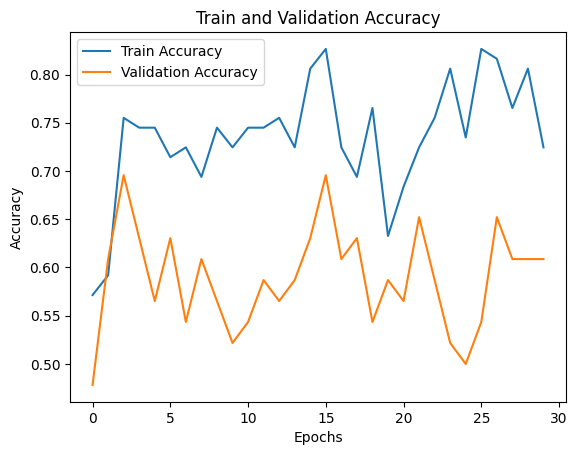

In [ ]:
# Fit the model and save the history for plotting
history = best_model.fit(training_data, epochs=30, validation_data=testing_data)

# Plotting train and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Change title and legend from 'Validation' to 'Test'

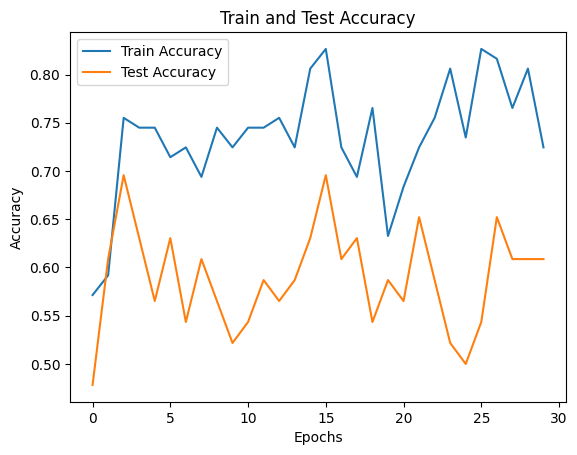

In [ ]:
# Plotting train and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

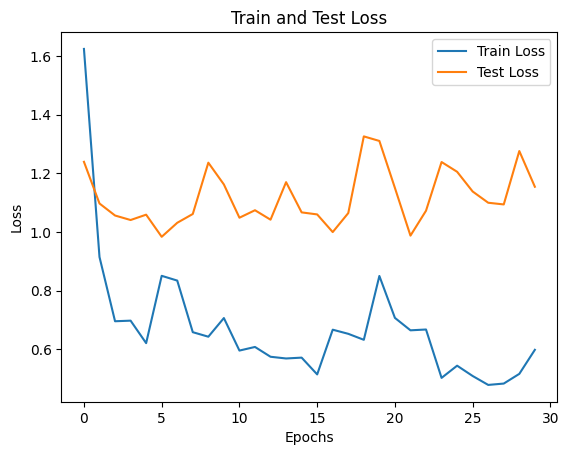

In [ ]:
# Plotting train and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Train and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Confusion Matrix

In [ ]:
# Load the true labels (ground truth)
y_true = testing_data.classes

# Get the class names from the data generator
class_names = list(training_data.class_indices.keys())

# Generate predictions using the trained model
y_pred_probabilities = best_model.predict(testing_data)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

2/2 [==============================] - 1s 158ms/step
Confusion Matrix:
[[2 0 0 0 0 2]
 [0 9 0 0 0 0]
 [0 0 4 0 5 0]
 [0 0 0 3 1 2]
 [0 0 1 1 3 3]
 [0 1 0 0 2 7]]


In [ ]:

python
Copy code
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        # Print("Normalized confusion matrix")
    else:
        cm = cm
        # Print('Confusion matrix, without normalization')

    # Print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

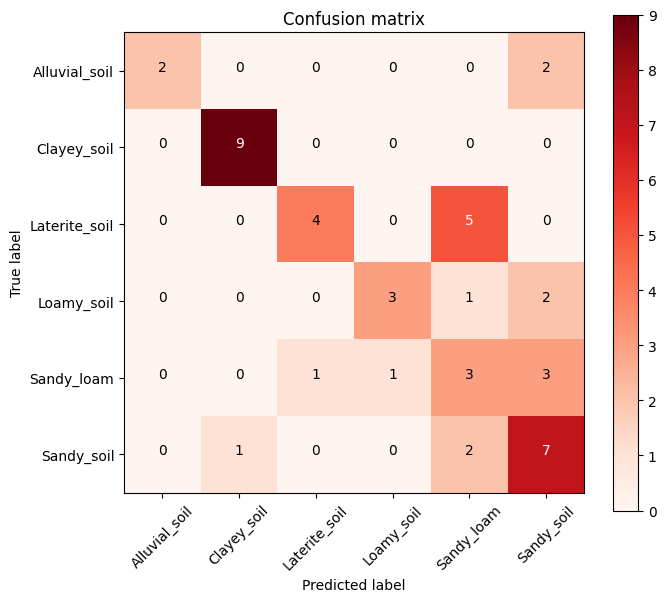

In [ ]:
np.set_printoptions(precision=2)

# Create a figure with a specific size
fig1 = plt.figure(figsize=(7, 6))

# Plot the confusion matrix using the defined function
plot_confusion_matrix(conf_matrix, classes=class_names, title='Confusion matrix')

# Display the plot
plt.show()

Observe predicted versus true labels

In [ ]:
# Predict on test data
array = best_model.predict_generator(testing_data, verbose=1)
answer = np.argmax(array, axis=1)

# Load the true labels (ground truth)
y_true = testing_data.classes

# Print predicted and true labels
print("Predicted Labels:\n", answer)
print("True Labels:\n", y_true)

<ipython-input-26-bfb1129fba8f>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  array = best_model.predict_generator(testing_data, verbose=1)


2/2 [==============================] - 1s 148ms/step
Predicted Labels:
 [0 5 5 0 1 1 1 1 1 1 1 1 1 2 4 2 2 4 4 4 4 2 4 5 3 3 5 3 2 4 5 5 4 3 5 4 5
 5 5 4 5 5 5 5 1 4]
True Labels:
 [0 0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 4 4 4 5
 5 5 5 5 5 5 5 5 5]
